# 3x3 Sensor Array for Water Sensor 
Author: Jonathan

## Load data path

In [1]:
import os
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib.dates as mdates
from datetime import datetime, timedelta


print(sys.executable)

%matplotlib ipympl


/usr/bin/python3


## Path checking

In [2]:
!ls "/tf/data"

ASM_module  cecilie  ec  karena  lawance  odorMaster  waterSensor  wendy


In [3]:
ls

capstone.ipynb  tempplateKeyf.csv  water3x3_processing.ipynb


## Raw data

### Read Data

#### Select file name

In [8]:
testingTime = '20250328_175223'
cumTimeOffset = 0

In [9]:
testingTime = '20250328_195930'
cumTimeOffset = 0

In [48]:
testingTime = '20250405_152759'
cumTimeOffset = 0#-10

In [7]:
testingTime = '20250405_184540'
cumTimeOffset = 0#-10

In [66]:
testingTime = '20250407_145016'
cumTimeOffset = 0#-10

In [40]:
testingTime = '20250410_181420' #200-30-25uL
cumTimeOffset = 0#-10

In [22]:
testingTime = '20250410_214039' #200-30-50uL
cumTimeOffset = 0#-10

In [56]:
testingTime = '20250411_110920' #200-30-75uL
cumTimeOffset = 0#-10

In [306]:
testingTime = '20250411_204730' #300-30-25uL
cumTimeOffset = 0#-10

In [ ]:
testingTime = '20250411_173902' #300-30-50uL
cumTimeOffset = 0#-10

In [ ]:
testingTime = '20250411_191314' #300-30-75uL
cumTimeOffset = 0#-10

In [40]:
testingTime = '20250507_134232' #2V heater, vinson PCB
cumTimeOffset = 0#-10

In [111]:
testingTime = '20250507_152548' #2.5V heater, vinson PCB 
cumTimeOffset = 0#-10

In [106]:
testingTime = '20250507_172448' #2.5V heater, vinson PCB 
cumTimeOffset = 0#-10

In [86]:
testingTime = '20250507_185329' #2.5V heater, vinson PCB , water only
cumTimeOffset = 0#-10

In [125]:
testingTime = '20250508_122502' #2.5V heater, vinson PCB , water only
cumTimeOffset = 0#-10

In [133]:
testingTime = '20250508_134441' #2.5V heater, vinson PCB , water only
cumTimeOffset = 0#-10

In [140]:
testingTime = '20250508_150644' #2.5V heater, vinson PCB , water only
cumTimeOffset = 0#-10

In [175]:
testingTime = '20250508_155734' #2.5V heater, vinson PCB 
cumTimeOffset = 0#-10

In [227]:
testingTime = '20250508_210456' #2.5V heater, vinson PCB , 50uL:100mL Ethanol
cumTimeOffset = 0#-10

In [10]:
testingTime = '20250508_220712' #2.5V heater, vinson PCB , 50uL:100mL Ethanol, W:E:W = 20:5:20, 100:150:100
cumTimeOffset = 0#-10

In [198]:
testingTime = '20250508_233918' #2.5V heater, vinson PCB , 50uL:100mL Ethanol, W:E:W = 20:5:20
cumTimeOffset = 0#-10

In [210]:
testingTime = '20250509_103357' #2.5V heater, vinson PCB , 50uL:100mL Acetone, W:E:W = 20:5:20
cumTimeOffset = 0#-10

In [224]:
testingTime = '20250509_112653' #2.5V heater, vinson PCB , 50uL:100mL Benzene, W:E:W = 20:5:20
cumTimeOffset = 0#-10

In [235]:
testingTime = '20250509_121737' #2.5V heater, vinson PCB , 50uL:100mL Toluene, W:E:W = 20:5:20
cumTimeOffset = 0#-10

In [246]:
testingTime = '20250509_130413' #2.5V heater, vinson PCB , 50uL:100mL FA, W:E:W = 20:5:20
cumTimeOffset = 0#-10

In [623]:
testingTime = '20250515_232816' #2.5V heater, vinson PCB , 50uL:100mL FA, W:E:W = 20:5:20
cumTimeOffset = 0#-10

In [628]:
testingTime = '20250516_163401' #2.5V heater, vinson PCB , 50uL:100mL FA, W:E:W = 20:5:20
cumTimeOffset = 0#-10

In [2]:
testingTime = '20250529_131146' #2.5V heater, 50uL:100mL FA, W:E:W = 20:5:20
cumTimeOffset = 0#-10

#### Read CSVs

In [3]:
csvFile = '/tf/data/waterSensor/aryData/sensor_'+testingTime+'.csv'
colnames = ['time']+[f'px{i}' for i in range(9)]
print(colnames)

testingCsvFile = 'aryData/testing_'+testingTime+'.txt'
sequenceCsvFile = '/tf/data/waterSensor/aryData/pump_sequence_'+testingTime+'.csv'

['time', 'px0', 'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8']


#### Read CSVs Modbus RTU 

14:46 073 0
14:52 113 0
14:59 203 0
15:05 303 0
15:11 076 0
15:17 116 0
15:23 206 0
15:30 306 0
15:35 073 0.1
15:41 113 0.1
15:47 203 0.1
15:53 303 0.1
15:59 076 0.1
16:05 116 0.1
16:11 206 0.1
16:17 306 0.1
16:23 073 0
16:28 073 0.5
16:35 113 0.5
16:41 113 0.5
16:48 203 0.5
16:55 303 0.5
16:51 076 0.5
17:06 116 0.5
17:12 206 0.5
17:18 306 0.5
17:24 073 0

### Read Sensor Data

In [8]:
#Sensor data
df=pd.read_csv(csvFile, names=colnames, header=None, skipfooter=1, engine='python')

df['datetime'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S%z').dt.tz_localize(None)
df = df.set_index(['datetime'])
df = df.drop('time', axis=1)

for i in range(9):
    df[f'resp{i}'] = df[f'px{i}'] - df[f'px{i}'].iloc[0]
# df = df.rolling(30).mean()
df


px0   px1   px2   px3   px4   px5   px6   px7   px8  \
datetime                                                                    
2025-05-29 13:11:48  2876  2884  2932  2054  2768  2882  2660  2860  2884   
2025-05-29 13:11:49  2390  2698  2860  1269  2160  2754  2098  2558  2831   
2025-05-29 13:11:57  2337  2656  2836  1202  2056  2692  2024  2504  2808   
2025-05-29 13:11:58  2340  2662  2842  1202  2054  2698  2031  2506  2808   
2025-05-29 13:11:59  2342  2660  2840  1200  2066  2712  2028  2506  2808   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2025-05-29 15:59:55  2414  2704  2848  1336  2112  2703  2044  2546  2814   
2025-05-29 15:59:56  2408  2698  2850  1333  2108  2704  2054  2542  2814   
2025-05-29 15:59:57  2412  2702  2850  1332  2104  2705  2056  2540  2813   
2025-05-29 15:59:58  2412  2700  2848  1329  2118  2702  2048  2548  2812   
2025-05-29 15:59:59  2412  2700  2848  1332  2117  2701  2050  2540  2813   

                     resp0  resp1  resp2  resp3  resp4  resp5  resp6  resp7  \
datetime                                                                      
2025-05-29 13:11:48      0      0      0      0      0      0      0      0   
2025-05-29 13:11:49   -486   -186    -72   -785   -608   -128   -562   -302   
2025-05-29 13:11:57   -539   -228    -96   -852   -712   -190   -636   -356   
2025-05-29 13:11:58   -536   -222    -90   -852   -714   -184   -629   -354   
2025-05-29 13:11:59   -534   -224    -92   -854   -702   -170   -632   -354   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2025-05-29 15:59:55   -462   -180    -84   -718   -656   -179   -616   -314   
2025-05-29 15:59:56   -468   -186    -82   -721   -660   -178   -606   -318   
2025-05-29 15:59:57   -464   -182    -82   -722   -664   -177   -604   -320   
2025-05-29 15:59:58   -464   -184    -84   -725   -650   -180   -612   -312   
2025-05-29 15:59:59   -464   -184    -84   -722   -651   -181   -610   -320   

                     resp8  
datetime                    
2025-05-29 13:11:48      0  
2025-05-29 13:11:49    -53  
2025-05-29 13:11:57    -76  
2025-05-29 13:11:58    -76  
2025-05-29 13:11:59    -76  
...                    ...  
2025-05-29 15:59:55    -70  
2025-05-29 15:59:56    -70  
2025-05-29 15:59:57    -71  
2025-05-29 15:59:58    -72  
2025-05-29 15:59:59    -71  

[7751 rows x 18 columns]

#### Plot sensor

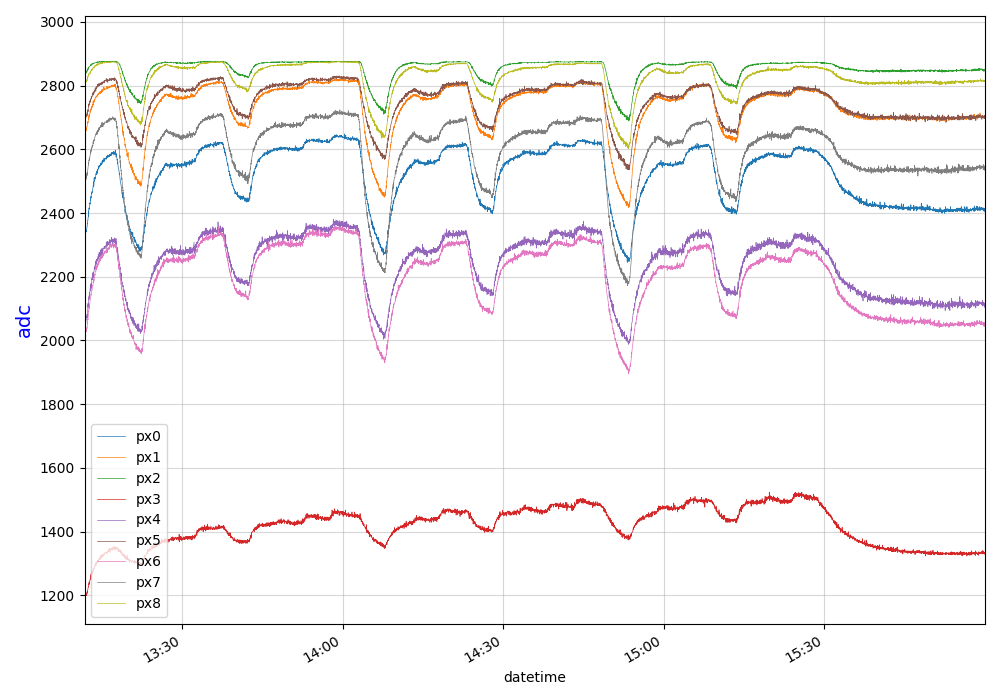

In [10]:
plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,7))

thisAx=ax
for i in range(9):
    df.plot(ax=thisAx, y=f'px{i}', lw=0.5) #, alpha = (i+1)/9, color='black'

thisAx.set_ylabel("adc",color="blue",fontsize=14)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(200))

thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
thisAx.set_xlim(df.index[0],df.index[-1])

fig.tight_layout()

### Read sequence data

#### Step flowing

In [11]:
#Sensor data
seq_df=pd.read_csv(sequenceCsvFile, usecols=['Time(s)']+[f"Pump {i+1} (rpm)" for i in range(6)])
seq_df['cumTime'] = seq_df['Time(s)'].cumsum(axis = 0)
seq_df = seq_df.rename(columns=dict(zip([f"Pump {i+1} (rpm)" for i in range(6)], [f"Pump{i+1}" for i in range(6)])))
seq_df = pd.DataFrame(
    data=seq_df.values.repeat(2, axis=0),  # Repeat each row twice
    columns=seq_df.columns                # Keep the column names
)

cumTimes = seq_df["cumTime"].values
for i in range(1, len(cumTimes), 2):
    if i + 1 < len(cumTimes):
        cumTimes[i] = cumTimes[i + 1] - 1
    else:
        cumTimes[i] = -1  # For the last duplicated row, no next row exists
seq_df["cumTime"] = seq_df["cumTime"]-seq_df["cumTime"][0]+cumTimeOffset
value_columns = [f"Pump{i}" for i in range(1, 6)]
# Scan rows and update only the value columns where all are 0
for i in range(1, len(seq_df)):  # Start from the second row (index 1)
    if (seq_df.loc[i, value_columns] == 0).all():  # Check if all value columns are 0
        seq_df.loc[i, value_columns] = seq_df.loc[i - 1, value_columns]  # Copy only value columns 
seq_df["timestamp"] = seq_df["cumTime"].apply(lambda x: df.index[0] + timedelta(seconds=x) if x >= 0 else None)
seq_df.set_index("timestamp", inplace=True)
# seq_df['id'] = np.linspace(0, seq_df.shape[0]-1, seq_df.shape[0], dtype=int)
seq_df[0:20]

Time(s)  Pump1  Pump2  Pump3  Pump4  Pump5  Pump6  \
timestamp                                                                
2025-05-29 13:11:48        5      0      0      0      0      0      0   
2025-05-29 13:11:52        5      0      0      0      0      0      0   
2025-05-29 13:11:53        5      0      0      0      0      0   -150   
2025-05-29 13:12:52        5      0      0      0      0      0   -150   
2025-05-29 13:12:53       60    100      0      0      0      0   -150   
2025-05-29 13:16:52       60    100      0      0      0      0   -150   
2025-05-29 13:16:53      240     20      0      0      0      0   -150   
2025-05-29 13:17:52      240     20      0      0      0      0   -150   
2025-05-29 13:17:53       60      0    100      0      0      0   -150   
2025-05-29 13:21:52       60      0    100      0      0      0   -150   
2025-05-29 13:21:53      240      0     20      0      0      0   -150   
2025-05-29 13:22:52      240      0     20      0      0      0   -150   
2025-05-29 13:22:53       60    100      0      0      0      0   -150   
2025-05-29 13:26:52       60    100      0      0      0      0   -150   
2025-05-29 13:26:53      240     20      0      0      0      0   -150   
2025-05-29 13:27:52      240     20      0      0      0      0   -150   
2025-05-29 13:27:53       60      0      0    100      0      0   -150   
2025-05-29 13:31:52       60      0      0    100      0      0   -150   
2025-05-29 13:31:53      240      0      0     20      0      0   -150   
2025-05-29 13:32:52      240      0      0     20      0      0   -150   

                     cumTime  
timestamp                     
2025-05-29 13:11:48        0  
2025-05-29 13:11:52        4  
2025-05-29 13:11:53        5  
2025-05-29 13:12:52       64  
2025-05-29 13:12:53       65  
2025-05-29 13:16:52      304  
2025-05-29 13:16:53      305  
2025-05-29 13:17:52      364  
2025-05-29 13:17:53      365  
2025-05-29 13:21:52      604  
2025-05-29 13:21:53      605  
2025-05-29 13:22:52      664  
2025-05-29 13:22:53      665  
2025-05-29 13:26:52      904  
2025-05-29 13:26:53      905  
2025-05-29 13:27:52      964  
2025-05-29 13:27:53      965  
2025-05-29 13:31:52     1204  
2025-05-29 13:31:53     1205  
2025-05-29 13:32:52     1264

#### Contineous flowing

In [36]:
#Sensor data
seq_df=pd.read_csv(sequenceCsvFile, usecols=['Time(s)']+[f"Pump {i+1} (rpm)" for i in range(6)])
seq_cycle = int(pd.read_csv(sequenceCsvFile)['Cycle'][0])
seq_df = pd.concat([seq_df]*seq_cycle)
seq_df['cumTime'] = seq_df['Time(s)'].cumsum(axis = 0)
seq_df = seq_df.rename(columns=dict(zip([f"Pump {i+1} (rpm)" for i in range(6)], [f"Pump{i+1}" for i in range(6)])))

seq_df = pd.DataFrame(
    data=seq_df.values.repeat(2, axis=0),  # Repeat each row twice
    columns=seq_df.columns                # Keep the column names
)
seq_df['cumTime'] = seq_df['cumTime'].shift(1).fillna(0)
seq_df.loc[seq_df.index[1::2], 'cumTime'] = seq_df.loc[seq_df.index[1::2], 'cumTime'] - 1

seq_df["timestamp"] = seq_df["cumTime"].apply(lambda x: df.index[0] + timedelta(seconds=x) if x >= 0 else None)
seq_df.set_index("timestamp", inplace=True)
seq_df

Time(s)  Pump1  Pump2  Pump3  Pump4  Pump5  Pump6  \
timestamp                                                                
2025-05-29 13:11:48        5      0      0      0      0      0      0   
2025-05-29 13:11:52        5      0      0      0      0      0      0   
2025-05-29 13:11:53        5      0      0      0      0      0   -150   
2025-05-29 13:11:57        5      0      0      0      0      0   -150   
2025-05-29 13:11:58       60    100      0      0      0      0   -150   
...                      ...    ...    ...    ...    ...    ...    ...   
2025-05-29 15:23:27       60    100      0      0      0      0   -150   
2025-05-29 15:23:28      240     20      0      0      0      0   -150   
2025-05-29 15:27:27      240     20      0      0      0      0   -150   
2025-05-29 15:27:28        5      0      0      0      0      0      0   
2025-05-29 15:27:32        5      0      0      0      0      0      0   

                     cumTime  
timestamp                     
2025-05-29 13:11:48      0.0  
2025-05-29 13:11:52      4.0  
2025-05-29 13:11:53      5.0  
2025-05-29 13:11:57      9.0  
2025-05-29 13:11:58     10.0  
...                      ...  
2025-05-29 15:23:27   7899.0  
2025-05-29 15:23:28   7900.0  
2025-05-29 15:27:27   8139.0  
2025-05-29 15:27:28   8140.0  
2025-05-29 15:27:32   8144.0  

[126 rows x 8 columns]

In [32]:
seq_df.to_csv('tempplateKeyf.csv')

#### Plot sequence

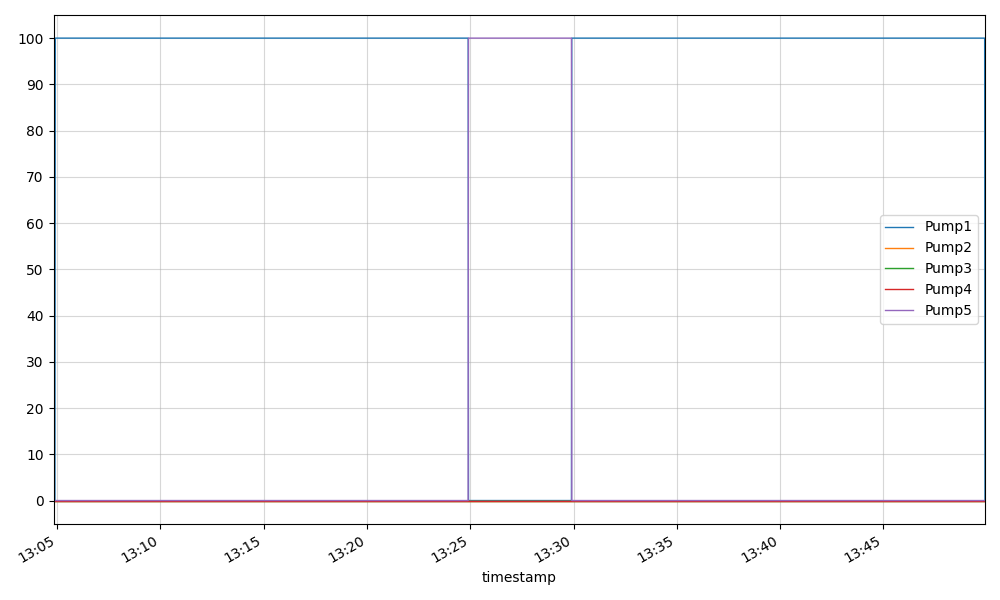

In [621]:
plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))

thisAx=ax
# seq_df.plot(ax=thisAx,x='timestamp', y='Pump1', lw=0.5)
for i in range(5):
    seq_df.plot(ax=thisAx, y=f'Pump{i+1}', lw=1)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(10))
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
thisAx.set_xlim(seq_df.index[0],seq_df.index[-2])

fig.tight_layout()

### Plot both Sensor & Sequence

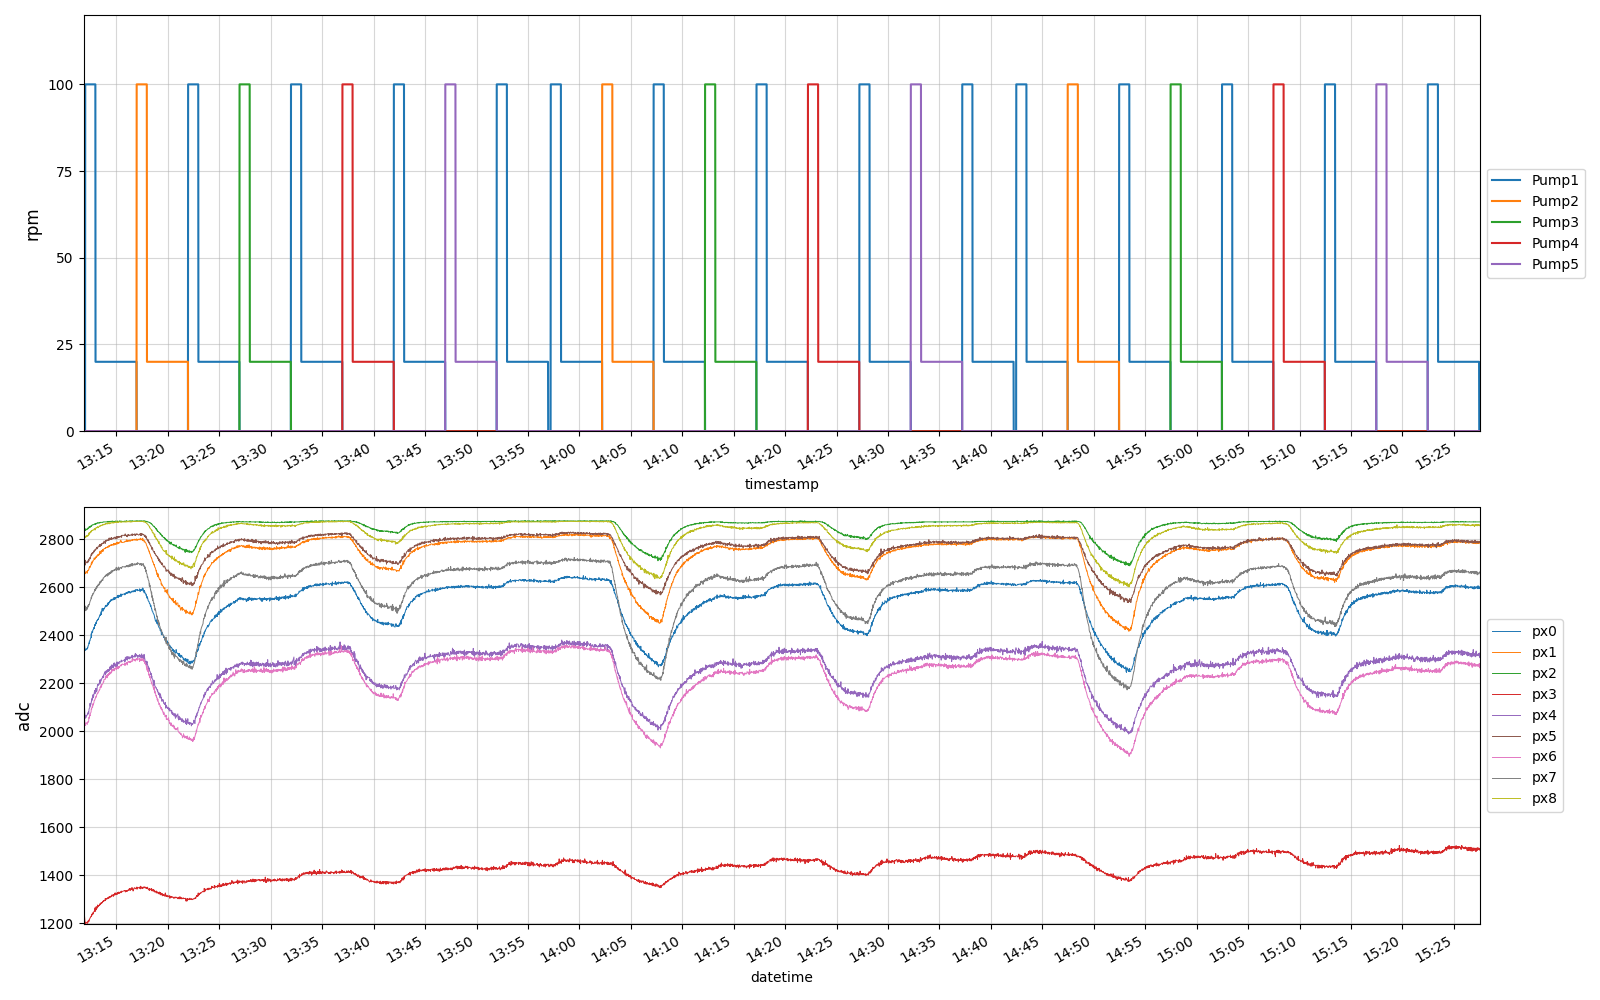

In [92]:
plt.close('all')
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(16,10))

thisAx=ax[0]
for i in range(5):
    seq_df.plot(ax=thisAx, y=f'Pump{i+1}', lw=1.5, alpha=1)
    
thisAx.set_ylabel("rpm",fontsize=12)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(25))
thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
thisAx.set_ylim([0, 120])
thisAx.set_xlim(seq_df.index.min(), seq_df.index.max())
thisAx.legend(loc='center left', bbox_to_anchor=(1, 0.5))

thisAx=ax[1]
for i in range(9):
    df.plot(ax=thisAx, y=f'px{i}', lw=0.7) #, alpha = (i+1)/9, color='black'
thisAx.set_ylabel("adc",fontsize=12)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(200))
thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
thisAx.set_ylim([df[[f'px{i}' for i in range(9)]].min().min(), df[[f'px{i}' for i in range(9)]].max().max()])
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
thisAx.set_xlim(seq_df.index.min(), seq_df.index.max())
thisAx.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
fig.tight_layout()

In [90]:
flowRatePt = 100
keyTimeBaseline = seq_df[(seq_df.Pump2==flowRatePt)|(seq_df.Pump3==flowRatePt)|(seq_df.Pump4==flowRatePt)|(seq_df.Pump5==flowRatePt)].index #(seq_df.Pump1==20)|
keyTimeBaseline = keyTimeBaseline[::2]
print(keyTimeBaseline)

DatetimeIndex(['2025-05-29 13:16:58', '2025-05-29 13:26:58',
               '2025-05-29 13:36:58', '2025-05-29 13:46:58',
               '2025-05-29 14:02:13', '2025-05-29 14:12:13',
               '2025-05-29 14:22:13', '2025-05-29 14:32:13',
               '2025-05-29 14:47:28', '2025-05-29 14:57:28',
               '2025-05-29 15:07:28', '2025-05-29 15:17:28'],
              dtype='datetime64[ns]', name='timestamp', freq=None)


#### Plot single point 

In [52]:
keyTime = seq_df[(seq_df.Pump2>0)|(seq_df.Pump3>0)|(seq_df.Pump4>0)|(seq_df.Pump5>0)].index
keyBaseline = keyTime[0]
keySignal = keyTime[1]
print(keyBaseline, keySignal)

2025-05-29 13:16:58 2025-05-29 13:17:57


In [53]:
matBaseline = np.reshape(df[df.index==keyBaseline][[f'px{i}' for i in range(9)]].to_numpy(), (-1,3)).astype(int)
matSignal = np.reshape(df[df.index==keySignal][[f'px{i}' for i in range(9)]].to_numpy(), (-1,3)).astype(int)

In [54]:
matSignal = matSignal/matBaseline

matSignal

array([], shape=(0, 3), dtype=float64)

/tmp/ipykernel_28/4266341327.py:4: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(matSignal, cmap = 'GnBu', vmin=0, vmax=1, interpolation='nearest') #


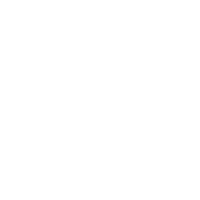

In [55]:
plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(2,2))
thisAx=ax
ax.imshow(matSignal, cmap = 'GnBu', vmin=0, vmax=1, interpolation='nearest') #
ax.set_axis_off()
fig.tight_layout()
# plt.savefig('exportSvg/pict.svg', bbox_inches='tight', pad_inches = 0)

#### PLot multi point

In [15]:
keyFrameId = [10, 16, 22, 28, 34, 40, 46, 52, 58, 64, 70, 76, 82, 88, 94, 100, ]
# keyFrameId = [10, 16,  28, 34, 40,  52, 58, 64, 70, 76, 82, 88, 94, 100, ]
keyFrameId = [key-1 for key in keyFrameId]

IndexError: positional indexers are out-of-bounds

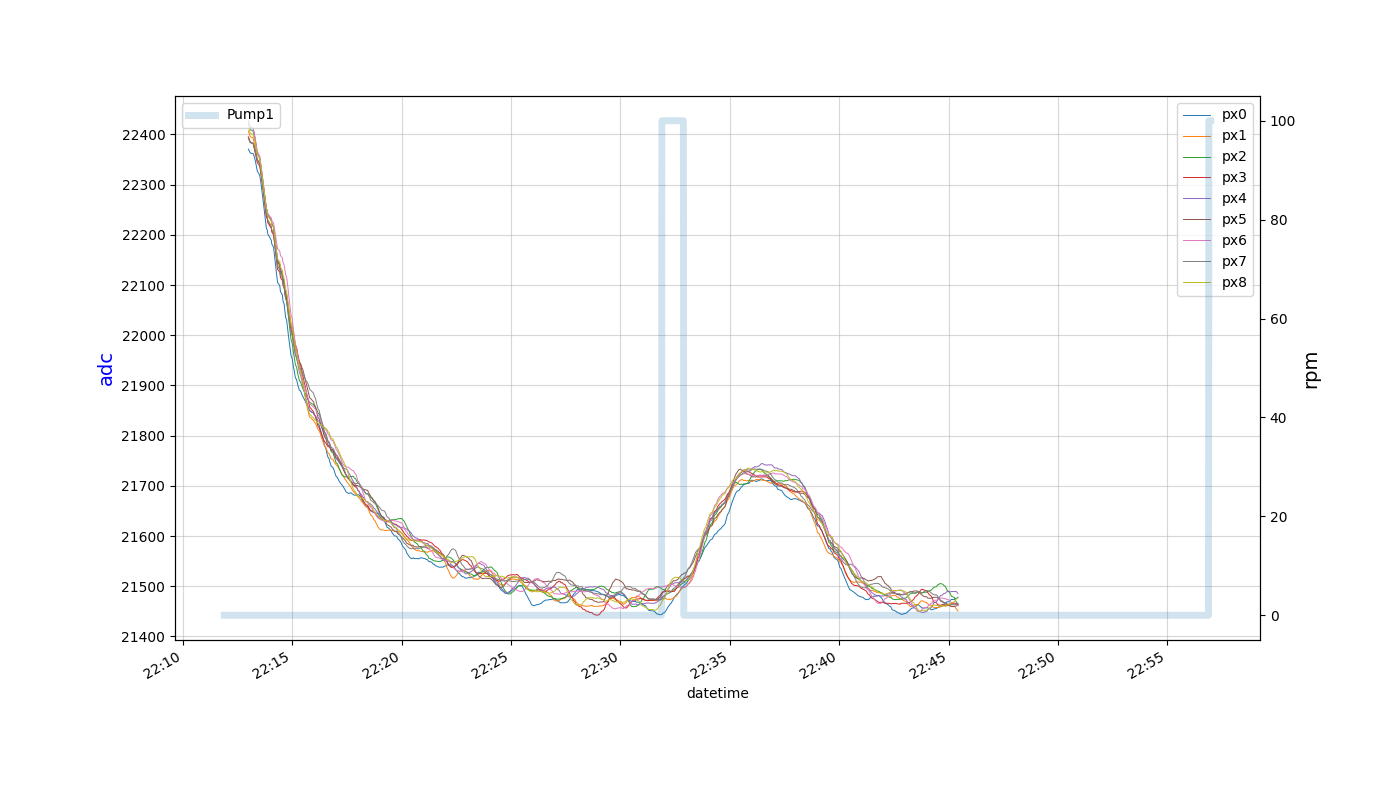

In [239]:
plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,8))

thisAx=ax
for i in range(9):
    df.rolling(30).mean().plot(ax=thisAx, y=f'px{i}', lw=0.7) #, alpha = (i+1)/9, color='black'

    
thisAx.set_ylabel("adc",color="blue",fontsize=14)



thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(100))
# thisAx.xaxis.set_major_locator(MultipleLocator(150))
thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))

thisAx=thisAx.twinx()
thisAx.set_ylabel("rpm",fontsize=14)
for i in range(5):
    seq_df.plot(ax=thisAx, y=f'Pump{i+1}', lw=5, alpha=0.2)
    # seq_df.plot(ax=thisAx, y=f'Pump{i+1}', lw=0.0, marker='x', ms=20, alpha=0.8)
    # seq_df.iloc[1::4].plot(ax=thisAx, y=f'Pump{i+1}', lw=0.0, marker='x', ms=20, alpha=0.8)
    seq_df.iloc[keyFrameId].plot(ax=thisAx, y=f'Pump{i+1}', lw=0.0, marker='x', ms=20, alpha=1)

thisAx.set_xlim(df.index[0],df.index[-1])
fig.tight_layout()

### Get Key frame

In [18]:
seq_df.loc[seq_df.iloc[1::4].index.dropna()].drop(['Pump6','Time(s)', 'cumTime'], axis=1)

Pump1  Pump2  Pump3  Pump4  Pump5
timestamp                                             
2025-05-07 13:42:57      0      0      0      0      0
2025-05-07 13:43:57    150      0      0      0      0
2025-05-07 13:48:42    150      0      0      0      0
2025-05-07 13:52:57      0    150      0      0      0
2025-05-07 13:53:57    150      0      0      0      0
2025-05-07 13:58:42    150      0      0      0      0
2025-05-07 14:02:57      0    150      0      0      0
2025-05-07 14:03:57    150      0      0      0      0
2025-05-07 14:08:42    150      0      0      0      0
2025-05-07 14:12:57      0      0    150      0      0
2025-05-07 14:13:57    150      0      0      0      0
2025-05-07 14:18:42    150      0      0      0      0
2025-05-07 14:22:57      0      0    150      0      0
2025-05-07 14:23:57    150      0      0      0      0
2025-05-07 14:28:42    150      0      0      0      0
2025-05-07 14:32:57      0      0      0    150      0
2025-05-07 14:33:57    150      0      0      0      0
2025-05-07 14:38:42    150      0      0      0      0
2025-05-07 14:42:57      0      0      0    150      0
2025-05-07 14:43:57    150      0      0      0      0
2025-05-07 14:48:42    150      0      0      0      0
2025-05-07 14:52:57      0      0      0      0    150
2025-05-07 14:53:57    150      0      0      0      0
2025-05-07 14:58:42    150      0      0      0      0
2025-05-07 15:02:57      0      0      0      0    150
2025-05-07 15:03:57    150      0      0      0      0

In [19]:
key_df = df.loc[seq_df.iloc[keyFrameId].index.dropna()]
key_df = pd.concat([key_df, seq_df.loc[seq_df.iloc[keyFrameId].index.dropna()].drop(['Pump6','Time(s)', 'cumTime'], axis=1)], axis=1)
key_df['ts'] = key_df.index
key_df = key_df.reset_index(drop=True)
key_df

KeyError: "[Timestamp('2025-05-07 14:08:42'), Timestamp('2025-05-07 14:13:42'), Timestamp('2025-05-07 14:38:42'), Timestamp('2025-05-07 14:43:42'), Timestamp('2025-05-07 14:48:42'), Timestamp('2025-05-07 14:53:42'), Timestamp('2025-05-07 14:58:42'), Timestamp('2025-05-07 15:03:42')] not in index"

In [6]:
#Testing schedule
colnames_testing = ['time', 'filter', 'conc']
df_testing = pd.read_csv(testingCsvFile, names=colnames_testing, header=None, sep=' ' )
df_testing['datetime'] = pd.to_datetime(str(df.index[0].date())+ ' '+ df_testing['time'], format='%Y-%m-%d %H:%M')
# df_testing = df_testing.set_index(['datetime'])
# df_testing = df_testing.drop('time', axis=1)
df_testing

time  filter  conc            datetime
0  17:03     303   0.0 2025-03-22 17:03:00
1  17:35     303   0.5 2025-03-22 17:35:00
2  17:41     303   0.0 2025-03-22 17:41:00
3  17:48     303   1.0 2025-03-22 17:48:00
4  17:54     303   0.0 2025-03-22 17:54:00
5  18:02     303   0.5 2025-03-22 18:02:00
6  18:08     303   0.0 2025-03-22 18:08:00
7  18:14     303   1.0 2025-03-22 18:14:00
8  18:20     303   0.0 2025-03-22 18:20:00

In [7]:
keyFrame = []
for idx, testTime in df_testing.iterrows():
    keyFrame.append(df.loc[testTime['datetime']+timedelta(seconds=60):testTime['datetime']+timedelta(seconds=120)].mean().to_numpy())

#### Plot Array frame

In [18]:
gasMat = key_df.iloc[0][[f'px{i}' for i in range(9)]].to_numpy()
gasMat = np.reshape(gasMat, (-1,3)).astype(int)
gasMat

array([[1348, 2044, 3802],
       [2401, 2397, 3805],
       [2765, 2940, 3804]])

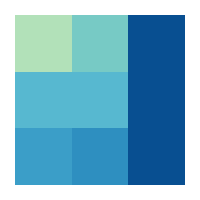

In [19]:
plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(2,2))
thisAx=ax
ax.imshow(gasMat, cmap = 'GnBu', vmin=0, vmax=4000, interpolation='nearest') #
ax.set_axis_off()
fig.tight_layout()
plt.savefig('exportSvg/pict.svg', bbox_inches='tight', pad_inches = 0)

In [13]:
gasMat=[]
for i in range(len(keyFrame)):
    gasMat.append(np.reshape(keyFrame[i], (-1,3)).astype(int))

In [15]:
gasMat

[array([[ 255,  429,  916],
        [1689, 1806, 2219],
        [ 686,  767, 1289]]),
 array([[ 245,  408,  952],
        [1735, 1744, 2177],
        [ 683,  766, 1344]]),
 array([[ 249,  416,  920],
        [1599, 1663, 2109],
        [ 665,  747, 1288]]),
 array([[ 250,  418,  903],
        [1510, 1600, 2054],
        [ 645,  725, 1251]]),
 array([[ 246,  410,  907],
        [1469, 1527, 2000],
        [ 632,  712, 1251]]),
 array([[ 246,  410,  894],
        [1404, 1474, 1953],
        [ 616,  694, 1222]]),
 array([[ 244,  407,  890],
        [1360, 1425, 1912],
        [ 606,  683, 1211]]),
 array([[ 241,  402,  892],
        [1334, 1381, 1878],
        [ 598,  674, 1209]]),
 array([[ 238,  396,  901],
        [1343, 1351, 1858],
        [ 594,  672, 1220]]),
 array([[ 252,  420,  830],
        [1185, 1301, 1770],
        [ 563,  636, 1103]]),
 array([[ 238,  396,  871],
        [1177, 1218, 1738],
        [ 559,  633, 1156]]),
 array([[ 237,  393,  872],
        [1154, 1178, 1706]

NameError: name 'gasMat' is not defined

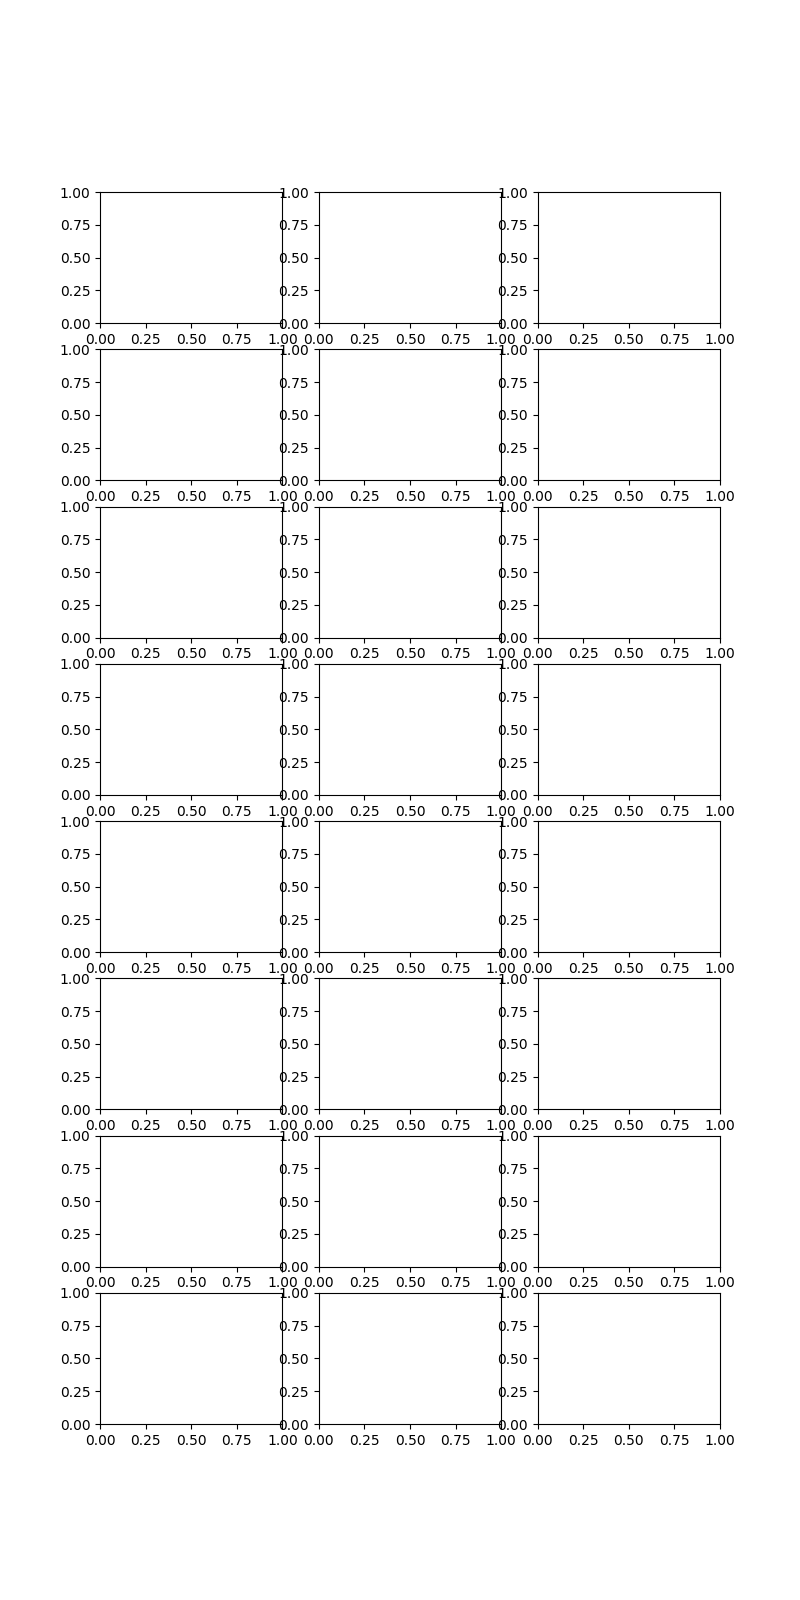

In [240]:
plt.close('all')
fig, ax = plt.subplots(nrows=8,ncols=3, figsize=(8,16))

ii=0

xLabel = ['0%', '10%', '50%'] 
yLabel = ['70um-30min', '110um-30min', '200um-30min', '300um-30min', '70um-60min', '110um-60min', '200um-60min', '300um-60min'] 
for x in range(8):
    for y in range(3):
        thisAx=ax[x, y]
        thisAx.imshow(gasMat[ii], cmap = 'GnBu', vmin=200, vmax=1500, interpolation='nearest') #
        # thisAx.set_axis_off()
        thisAx.set_xticks([])
        thisAx.set_yticks([])
        thisAx.spines['top'].set_visible(False)
        thisAx.spines['right'].set_visible(False)
        thisAx.spines['bottom'].set_visible(False)
        thisAx.spines['left'].set_visible(False)
        # if x == 0:
        #     thisAx.set_title(xLabel[y])
        # if y == 0:
        #     thisAx.set_ylabel(yLabel[x])
        ii=ii+1
fig.tight_layout()
# plt.savefig('exportSvg/pict.svg', bbox_inches='tight', pad_inches = 0)

### Get Key frame (cont)

In [89]:
flowRatePt = 20
keyTime = seq_df[(seq_df.Pump2==flowRatePt)|(seq_df.Pump3==flowRatePt)|(seq_df.Pump4==flowRatePt)|(seq_df.Pump5==flowRatePt)].index #(seq_df.Pump1==20)|
keyTime = keyTime[1::2]
print(keyTime)

DatetimeIndex(['2025-05-29 13:21:57', '2025-05-29 13:31:57',
               '2025-05-29 13:41:57', '2025-05-29 13:51:57',
               '2025-05-29 14:07:12', '2025-05-29 14:17:12',
               '2025-05-29 14:27:12', '2025-05-29 14:37:12',
               '2025-05-29 14:52:27', '2025-05-29 15:02:27',
               '2025-05-29 15:12:27', '2025-05-29 15:22:27'],
              dtype='datetime64[ns]', name='timestamp', freq=None)


#### Plot timeseries with keyframe

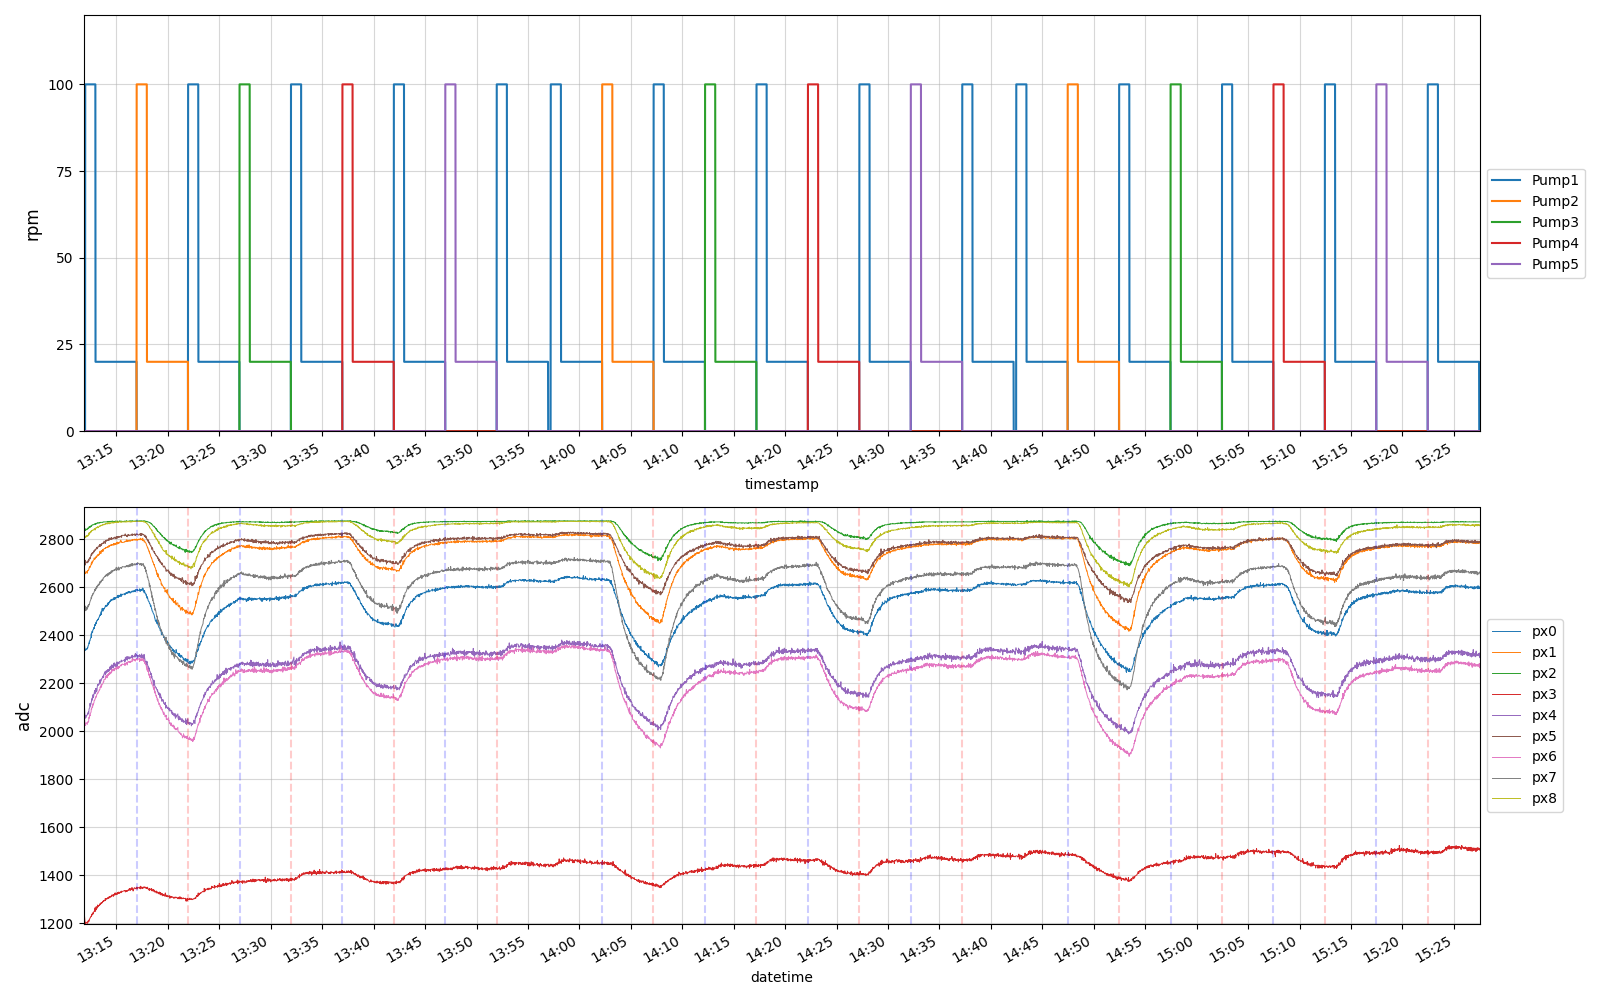

In [93]:
plt.close('all')
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(16,10))

thisAx=ax[0]
for i in range(5):
    seq_df.plot(ax=thisAx, y=f'Pump{i+1}', lw=1.5, alpha=1)
    
thisAx.set_ylabel("rpm",fontsize=12)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(25))
thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
thisAx.set_ylim([0, 120])
thisAx.set_xlim(seq_df.index.min(), seq_df.index.max())
thisAx.legend(loc='center left', bbox_to_anchor=(1, 0.5))

thisAx=ax[1]
for i in range(9):
    df.plot(ax=thisAx, y=f'px{i}', lw=0.7) #, alpha = (i+1)/9, color='black'
thisAx.set_ylabel("adc",fontsize=12)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(200))
thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
thisAx.set_ylim([df[[f'px{i}' for i in range(9)]].min().min(), df[[f'px{i}' for i in range(9)]].max().max()])
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
thisAx.set_xlim(seq_df.index.min(), seq_df.index.max())
thisAx.legend(loc='center left', bbox_to_anchor=(1, 0.5))


for time in keyTime:
    thisAx.axvline(x=time, color='red', linestyle='--', alpha=0.2)
    
for time in keyTimeBaseline:
    thisAx.axvline(x=time, color='blue', linestyle='--', alpha=0.2)
    
fig.tight_layout()

#### Plot Array frame

##### 1 frame

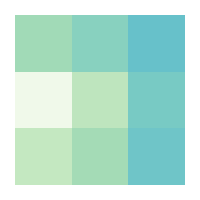

In [110]:
gasMat = np.reshape(df.loc[keyTime[0]][[f'px{i}' for i in range(9)]].to_numpy(), (-1,3)).astype(int)

plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(2,2))
thisAx=ax
ax.imshow(gasMat, cmap = 'GnBu', vmin=df[[f'px{i}' for i in range(9)]].min().min(), vmax=4000, interpolation='nearest') #
ax.set_axis_off()
fig.tight_layout()
#plt.savefig('exportSvg/pict.svg', bbox_inches='tight', pad_inches = 0)

## PCA

In [103]:
key_df[[f'Pump{i}' for i in range(1, 6)]]

Pump1  Pump2  Pump3  Pump4  Pump5
0       0      0      0      0      0
1     200      0      0      0      0
2     200      0      0      0      0
3       0    200      0      0      0
4     200      0      0      0      0
5     200      0      0      0      0
6       0    200      0      0      0
7     200      0      0      0      0
8     200      0      0      0      0
9       0      0    200      0      0
10      0      0    200      0      0
11    200      0      0      0      0
12    200      0      0      0      0
13      0      0    200      0      0
14    200      0      0      0      0
15    200      0      0      0      0
16      0      0      0    200      0
17    200      0      0      0      0
18    200      0      0      0      0
19      0      0      0    200      0
20    200      0      0      0      0
21    200      0      0      0      0
22      0      0      0      0    200
23    200      0      0      0      0
24    200      0      0      0      0
25      0      0      0      0    200
26    200      0      0      0      0

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#### Data preview

In [21]:
key_df[[f'px{i}' for i in range(1, 9)]]

px1   px2   px3   px4   px5   px6   px7   px8
0   2044  3802  2401  2397  3805  2765  2940  3804
1   2041  3807  2409  2398  3803  2758  2948  3807
2   2030  3805  2405  2400  3806  2764  2946  3806
3   2032  3807  2405  2399  3803  2759  2942  3805
4   2025  3806  2405  2402  3808  2756  2941  3807
5   2025  3805  2407  2393  3806  2759  2941  3806
6   2034  3806  2394  2380  3802  2759  2943  3805
7   2031  3805  2394  2391  3805  2759  2938  3806
8   2025  3808  2402  2383  3806  2753  2939  3807
9   2030  3806  2389  2370  3809  2754  2935  3807
10  2046  3808  2368  2356  3807  2745  2927  3807
11  2020  3803  2388  2369  3803  2745  2929  3803
12  2043  3806  2365  2344  3805  2741  2924  3806
13  2042  3802  2358  2347  3802  2742  2925  3803
14  2024  3806  2372  2352  3806  2744  2929  3805
15  2028  3807  2363  2347  3806  2746  2928  3805
16  2034  3807  2352  2328  3804  2733  2923  3807
17  2035  3808  2346  2325  3804  2727  2917  3804
18  2042  3804  2326  2309  3804  2717  2907  3802
19  2042  3805  2318  2304  3806  2723  2909  3804

In [22]:
key_df['yy']= key_df[[f'Pump{i}' for i in range(1, 6)]].values.argmax(axis=1)
key_df

px0   px1   px2   px3   px4   px5   px6   px7   px8  resp0  ...  resp6  \
0   1348  2044  3802  2401  2397  3805  2765  2940  3804      0  ...      8   
1   1346  2041  3807  2409  2398  3803  2758  2948  3807     -2  ...      1   
2   1336  2030  3805  2405  2400  3806  2764  2946  3806    -12  ...      7   
3   1340  2032  3807  2405  2399  3803  2759  2942  3805     -8  ...      2   
4   1338  2025  3806  2405  2402  3808  2756  2941  3807    -10  ...     -1   
5   1334  2025  3805  2407  2393  3806  2759  2941  3806    -14  ...      2   
6   1340  2034  3806  2394  2380  3802  2759  2943  3805     -8  ...      2   
7   1343  2031  3805  2394  2391  3805  2759  2938  3806     -5  ...      2   
8   1332  2025  3808  2402  2383  3806  2753  2939  3807    -16  ...     -4   
9   1339  2030  3806  2389  2370  3809  2754  2935  3807     -9  ...     -3   
10  1351  2046  3808  2368  2356  3807  2745  2927  3807      3  ...    -12   
11  1330  2020  3803  2388  2369  3803  2745  2929  3803    -18  ...    -12   
12  1351  2043  3806  2365  2344  3805  2741  2924  3806      3  ...    -16   
13  1351  2042  3802  2358  2347  3802  2742  2925  3803      3  ...    -15   
14  1336  2024  3806  2372  2352  3806  2744  2929  3805    -12  ...    -13   
15  1339  2028  3807  2363  2347  3806  2746  2928  3805     -9  ...    -11   
16  1344  2034  3807  2352  2328  3804  2733  2923  3807     -4  ...    -24   
17  1344  2035  3808  2346  2325  3804  2727  2917  3804     -4  ...    -30   
18  1341  2042  3804  2326  2309  3804  2717  2907  3802     -7  ...    -40   
19  1345  2042  3805  2318  2304  3806  2723  2909  3804     -3  ...    -34   

    resp7  resp8  Pump1  Pump2  Pump3  Pump4  Pump5                  ts  yy  
0      -2      0    150      0      0      0      0 2025-04-07 14:56:06   0  
1       6      3    150      0      0      0      0 2025-04-07 14:56:06   0  
2       4      2      0    150      0      0      0 2025-04-07 15:01:06   1  
3       0      1    150      0      0      0      0 2025-04-07 15:06:06   0  
4      -1      3      0    150      0      0      0 2025-04-07 15:11:06   1  
5      -1      2    150      0      0      0      0 2025-04-07 15:16:06   0  
6       1      1      0      0    150      0      0 2025-04-07 15:21:06   2  
7      -4      2      0      0    150      0      0 2025-04-07 15:21:06   2  
8      -3      3    150      0      0      0      0 2025-04-07 15:26:06   0  
9      -7      3      0      0    150      0      0 2025-04-07 15:31:06   2  
10    -15      3    150      0      0      0      0 2025-04-07 15:36:06   0  
11    -13     -1      0      0      0    150      0 2025-04-07 15:41:06   3  
12    -18      2    150      0      0      0      0 2025-04-07 15:46:06   0  
13    -17     -1    150      0      0      0      0 2025-04-07 15:46:06   0  
14    -13      1      0      0      0    150      0 2025-04-07 15:51:06   3  
15    -14      1    150      0      0      0      0 2025-04-07 15:56:06   0  
16    -19      3      0      0      0      0    150 2025-04-07 16:01:06   4  
17    -25      0    150      0      0      0      0 2025-04-07 16:06:06   0  
18    -35     -2      0      0      0      0    150 2025-04-07 16:11:06   4  
19    -33      0      0      0      0      0    150 2025-04-07 16:11:06   4  

[20 rows x 25 columns]

In [46]:
key_df['yy'].value_counts()[0]

10

#### Plot Array

[1348 2044 3802 2401 2397 3805 2765 2940 3804]
[1346 2041 3807 2409 2398 3803 2758 2948 3807]
[1336 2030 3805 2405 2400 3806 2764 2946 3806]
[1340 2032 3807 2405 2399 3803 2759 2942 3805]
[1338 2025 3806 2405 2402 3808 2756 2941 3807]
[1334 2025 3805 2407 2393 3806 2759 2941 3806]
[1340 2034 3806 2394 2380 3802 2759 2943 3805]
[1343 2031 3805 2394 2391 3805 2759 2938 3806]
[1332 2025 3808 2402 2383 3806 2753 2939 3807]
[1339 2030 3806 2389 2370 3809 2754 2935 3807]
[1351 2046 3808 2368 2356 3807 2745 2927 3807]
[1330 2020 3803 2388 2369 3803 2745 2929 3803]
[1351 2043 3806 2365 2344 3805 2741 2924 3806]
[1351 2042 3802 2358 2347 3802 2742 2925 3803]
[1336 2024 3806 2372 2352 3806 2744 2929 3805]
[1339 2028 3807 2363 2347 3806 2746 2928 3805]
[1344 2034 3807 2352 2328 3804 2733 2923 3807]
[1344 2035 3808 2346 2325 3804 2727 2917 3804]
[1341 2042 3804 2326 2309 3804 2717 2907 3802]
[1345 2042 3805 2318 2304 3806 2723 2909 3804]


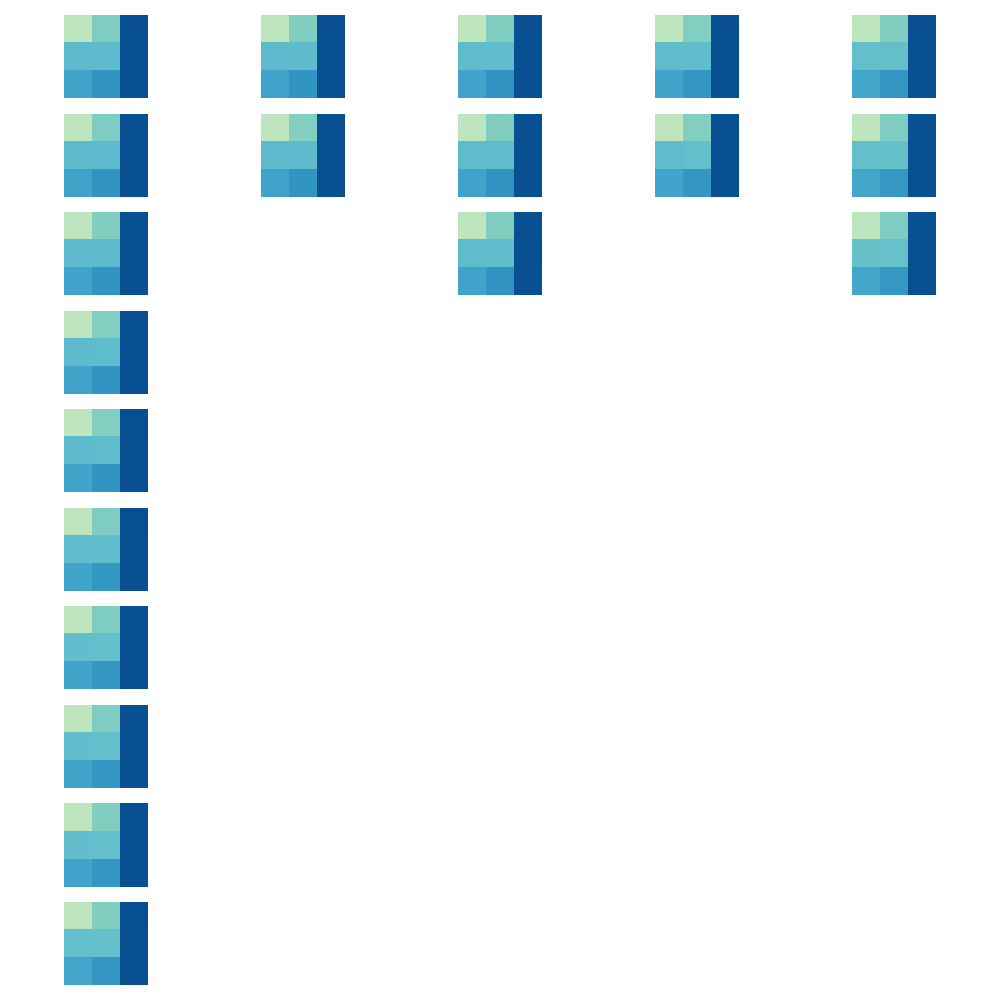

In [49]:
key_df
pltIdd = [0,0,0,0,0,0]
plt.close('all')
fig, ax = plt.subplots(nrows=key_df['yy'].value_counts()[0],ncols=key_df['yy'].max()+1, figsize=(10,10))
for index, row in key_df.iterrows():
    # print(index, row['yy'])
    thisAx=ax[pltIdd[row['yy']],row['yy']]
    pltIdd[row['yy']] = pltIdd[row['yy']]+1
    gasMat = row[[f'px{i}' for i in range(9)]].to_numpy()
    print(gasMat)
    gasMat = np.reshape(gasMat, (-1,3)).astype(int)
    thisAx.imshow(gasMat, cmap = 'GnBu', vmin=200, vmax=4000, interpolation='nearest') #

for i in range(key_df['yy'].value_counts()[0]):
    for j in range(key_df['yy'].max()+1):
        thisAx=ax[i,j]
        thisAx.set_axis_off()
fig.tight_layout()
# plt.savefig('exportSvg/pict.svg', bbox_inches='tight', pad_inches = 0)

#### Cal

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(key_df[[f'px{i}' for i in range(1, 9)]])

# Apply PCA to reduce dimensions
pca = PCA(n_components=3)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# label_mapping = {label: idx for idx, label in enumerate(y.unique())}
# y_encoded = y.map(label_mapping)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
# pca_df['label'] = key_df[[f'Pump{i}' for i in range(1, 6)]]*3
# Split the data into training and testing sets
pca_df['yy'] = key_df['yy']
pca_df

PC1       PC2       PC3  yy
0   1.065853 -2.425423  0.583673   0
1   2.097019 -0.259414  2.023957   0
2   2.390190 -0.382957 -0.244363   1
3   1.691169 -0.759389  0.651000   0
4   2.463938  1.049629 -0.972894   1
5   2.097054 -0.184112 -0.881700   0
6   1.101101 -1.254412  0.895447   2
7   1.490421 -0.415703 -0.073845   2
8   1.917757  1.375335 -0.318442   0
9   1.327694  1.633472 -0.777151   2
10 -0.357444  1.996489  1.488348   0
11 -0.266488 -2.118489 -1.898996   3
12 -1.166136  0.606812  1.014378   0
13 -2.105493 -2.614522  0.405201   0
14 -0.218144  0.578761 -1.311893   3
15 -0.490149  0.947413 -0.734801   0
16 -1.485347  1.369299  0.490581   4
17 -2.666633  0.908066  0.126853   0
18 -4.764638 -0.795336 -0.301751   4
19 -4.121725  0.744481 -0.163602   4

In [51]:
color_dict = {
    0: "blue",
    1: "red",
    2: "green",
    3: "orange",
    4: "purple",
    5: "cyan",
}


#### Plot

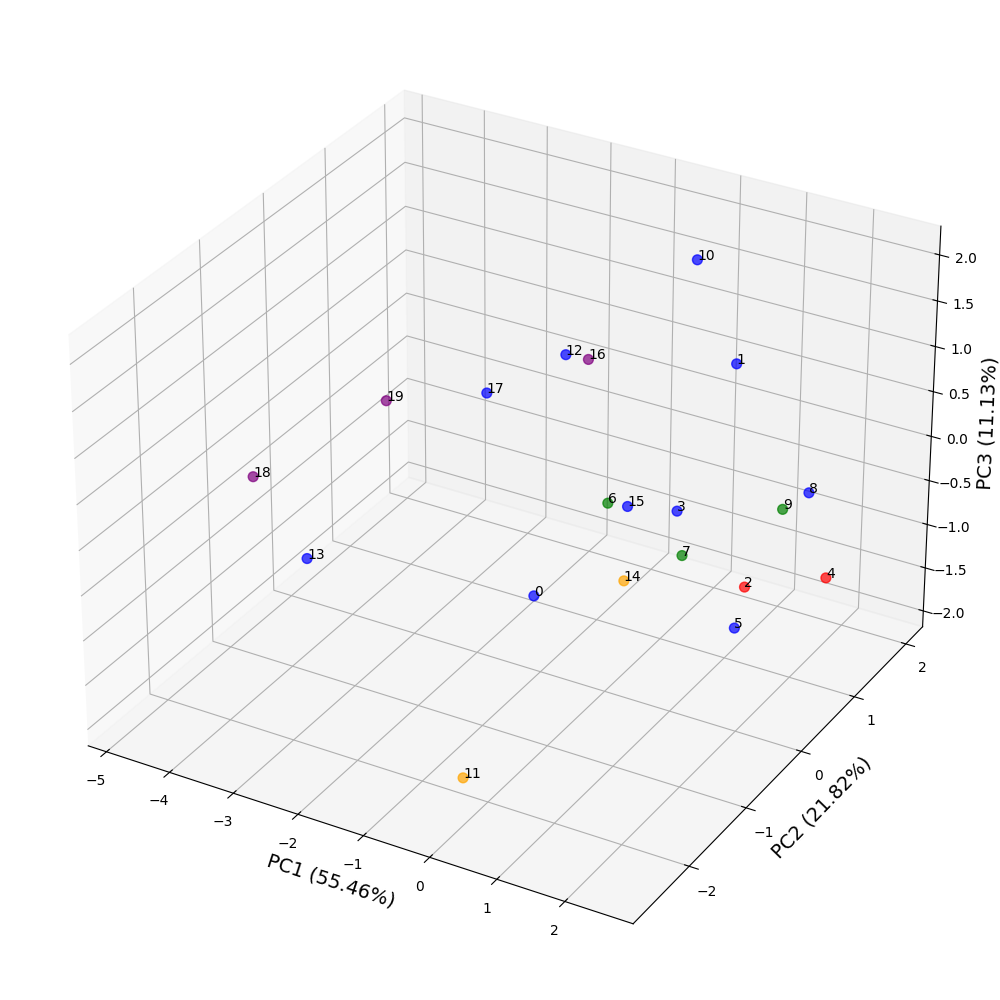

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming `pca_df` is a DataFrame with columns 'PC1', 'PC2', and 'PC3'
# And `pca` is a fitted PCA model with `explained_variance_ratio_`

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter using matplotlib
ax.scatter(
    pca_df['PC1'],  # X-axis
    pca_df['PC2'],  # Y-axis
    pca_df['PC3'],  # Z-axis
    c=pca_df['yy'].map(color_dict),       # Color of points
    s=50,           # Size of points
    alpha=0.7       # Transparency
)
for index, row in pca_df.iterrows():
    # print(row)
    # ax.text(9, 0, 0, "red", color='red')
    ax.text(row['PC1'], row['PC2'], row['PC3'], index)
# Set axis labels with explained variance ratios
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)", fontsize=14)

# Optional: Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

In [107]:
color_list = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
]


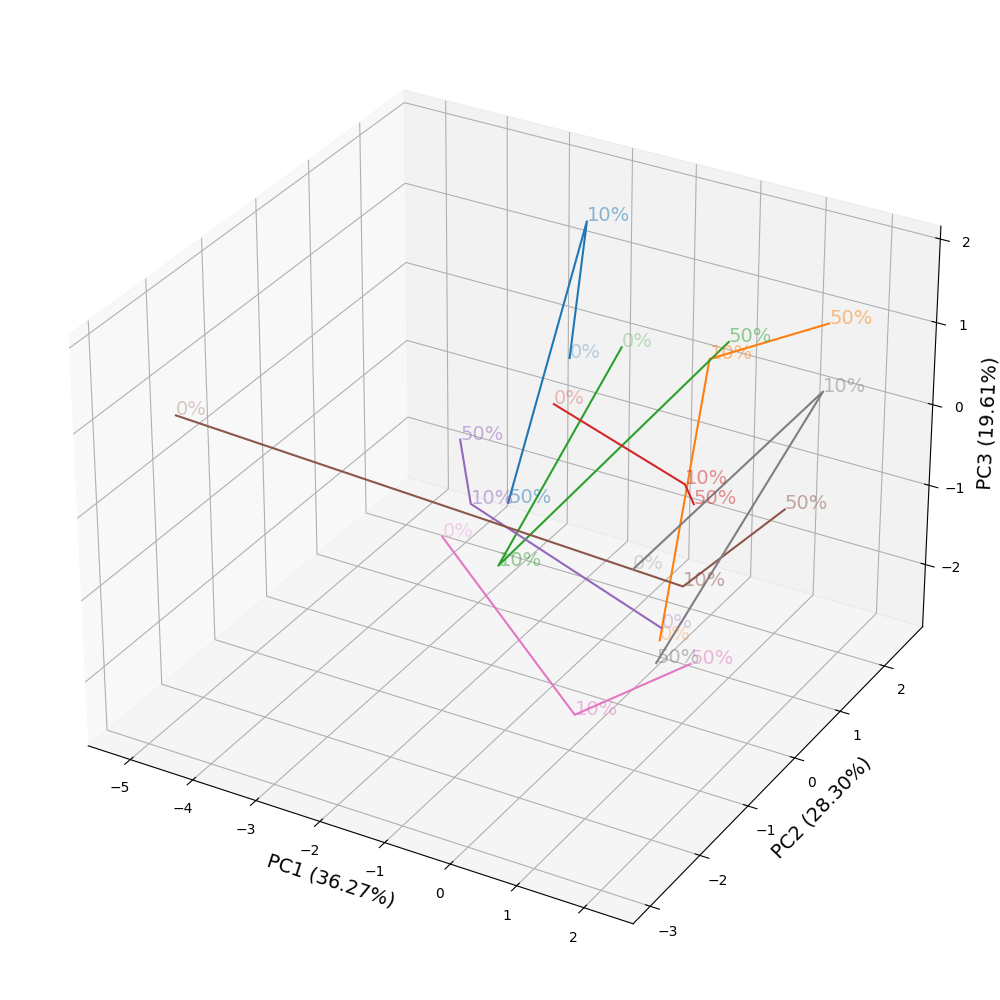

In [108]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.interpolate import splprep, splev

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
thisAx = ax
for memb in range(8):
    thisAx.plot(X_pca.T[0][[memb, memb+8, memb+8*2]], X_pca.T[1][[memb, memb+8, memb+8*2]], X_pca.T[2][[memb, memb+8, memb+8*2]],color=color_list[memb])
    # thisAx.text(X_pca.T[0][memb],X_pca.T[1][memb],X_pca.T[2][memb], yLabel[memb],color=color_list[memb], size=14)
    thisAx.text(X_pca.T[0][memb],X_pca.T[1][memb],X_pca.T[2][memb], '0%',color=color_list[memb], size=14, alpha=0.3)
    thisAx.text(X_pca.T[0][memb+8],X_pca.T[1][memb+8],X_pca.T[2][memb+8], '10%',color=color_list[memb], size=14, alpha=0.5)
    thisAx.text(X_pca.T[0][memb+8*2],X_pca.T[1][memb+8*2],X_pca.T[2][memb+8*2], '50%',color=color_list[memb], size=14, alpha=0.5)

    # # Fit a B-spline to the data
    # tck, u = splprep([X_pca.T[0][[memb, memb+8, memb+8*2]], X_pca.T[1][[memb, memb+8, memb+8*2]], X_pca.T[2][[memb, memb+8, memb+8*2]]], s=2)  # 's' is the smoothing factor (adjustable)
    # u_fine = np.linspace(0, 1, 100)  # Fine parameterization for a smooth curve
    # pc1_smooth, pc2_smooth, pc3_smooth = splev(u_fine, tck)
    
    # # Plot the smooth curve
    # thisAx.plot(pc1_smooth, pc2_smooth, pc3_smooth, color=color, linewidth=2, alpha=0.8)# , label=f"{label} Trend Curve")
    # thisAx.text(subset['PC1'].iloc[0], subset['PC2'].iloc[0], subset['PC3'].iloc[0], label, color=color, size=20)



thisAx.set_xlabel(f"PC{1} ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
thisAx.set_ylabel(f"PC{2} ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
thisAx.set_zlabel(f"PC{3} ({pca.explained_variance_ratio_[2]*100:.2f}%)", fontsize=14)
fig.tight_layout()

In [82]:
y=pca_df['label']

In [78]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.interpolate import splprep, splev

label_mapping = {label: idx for idx, label in enumerate(y.unique())}

y_encoded = y.map(label_mapping)
alphaAry = dfLabel.to_numpy().max(axis=1)
alphaAryi = 0
# Close any existing plots
plt.close('all')

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
thisAx = ax
# Scatter plot of the PCA-transformed data in 3D with nonlinear trend curves
for label, color in zip(label_mapping.keys(), ['blue', 'green', 'red', 'orange', 'purple']):
    subset = pca_df[pca_df['label'] == label]
    alphaVec = alphaAry[alphaAryi:alphaAryi + len(subset['PC1'])]
    alphaAryi = alphaAryi + len(subset['PC1'])
    # Scatter plot
    for i in range(len(subset['PC1'])):
        thisAx.scatter(
            subset['PC1'].iloc[i], 
            subset['PC2'].iloc[i], 
            subset['PC3'].iloc[i], 
            color=color, 
            alpha=alphaVec[i],  # Set transparency for each point
            s=100
        )
    

    # thisAx.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=label, alpha=alphaVec, color=color, s=100)
    
    # Prepare data for spline fitting (sorted by PC1 for smoothness)
    data = subset[['PC1', 'PC2', 'PC3']].sort_values(by='PC1').to_numpy()
    pc1, pc2, pc3 = data[:, 0], data[:, 1], data[:, 2]
    
    # Fit a B-spline to the data
    tck, u = splprep([pc1, pc2, pc3], s=2)  # 's' is the smoothing factor (adjustable)
    u_fine = np.linspace(0, 1, 100)  # Fine parameterization for a smooth curve
    pc1_smooth, pc2_smooth, pc3_smooth = splev(u_fine, tck)
    
    # Plot the smooth curve
    thisAx.plot(pc1_smooth, pc2_smooth, pc3_smooth, color=color, linewidth=2, alpha=0.8)# , label=f"{label} Trend Curve")
    thisAx.text(subset['PC1'].iloc[0], subset['PC2'].iloc[0], subset['PC3'].iloc[0], label, color=color, size=20)

# Customize the plot
#title = "3D PCA with SVM Decision Boundary"
thisAx.set_title(title, fontsize=16)

thisAx.set_xlabel(f"PC{1} ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
thisAx.set_ylabel(f"PC{2} ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
thisAx.set_zlabel(f"PC{3} ({pca.explained_variance_ratio_[2]*100:.2f}%)", fontsize=14)
# thisAx.legend(title="Label", fontsize=12)

thisAx.azim = -110
thisAx.dist = 0
thisAx.elev = -160
# Add a grid
thisAx.grid(which='major', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'y' is not defined

## Baseline removal 

In [170]:
df[['px0','mu0', 'var0']]

px0           mu0        var0
datetime                                                   
2025-05-08 15:57:45           NaN           NaN  999.000000
2025-05-08 15:57:53           NaN           NaN  999.000000
2025-05-08 15:57:54           NaN           NaN  999.000000
2025-05-08 15:57:55           NaN           NaN  999.000000
2025-05-08 15:58:03           NaN           NaN  999.000000
...                           ...           ...         ...
2025-05-08 18:18:54  21690.033333  21683.623491   29.524587
2025-05-08 18:18:55  21693.033333  21683.656299   30.751646
2025-05-08 18:18:56  21690.833333  21683.736564   31.551647
2025-05-08 18:18:57  21680.033333  21683.752584   31.827191
2025-05-08 18:18:58  21673.833333  21683.690793   29.308558

[6985 rows x 3 columns]

In [ ]:
# Initialize columns for mu and var
for i in range(9):
    df[f'mu{i}'] = float(df[f'px{i}'].iloc[0])
    df[f'var{i}'] = float(999)

# Rolling window size
window_size = 120

# Function to calculate updated mu and var
def update_mu_var(window, prior_mu, prior_var):
    likelihood_mu = window.mean()
    likelihood_var = window.var()
    
    # Update using provided formula
    updated_mu = (likelihood_mu * prior_var + prior_mu * likelihood_var) / (prior_var + likelihood_var)
    if likelihood_mu > prior_mu:
        updated_var = (1/(1*likelihood_var) + 1/(1*prior_var))**(-1)
    else:
        updated_var = (1/(1000*likelihood_var) + 1/(1*prior_var))**(-1)
    
    return updated_mu, updated_var

# Iterate over the rolling windows
pxId = 0
for i in range(window_size - 1, len(df)):
    # Current rolling window using .iloc
    window = df.iloc[i - window_size + 1:i + 1, 0]  # Slice only the 'px0' column values
    
    if i == window_size - 1:  # Initial prior values for the first window
        prior_mu, prior_var = window.mean(), window.var()
    else:  # Use the previous row's mu and var as the prior
        prior_mu = df.iloc[i - 1][f'mu{pxId}']
        prior_var = df.iloc[i - 1][f'var{pxId}']
    
    # Update mu and var
    updated_mu, updated_var = update_mu_var(window, prior_mu, prior_var)
    
    # Assign the results to the DataFrame
    df.iloc[i, df.columns.get_loc(f'mu{pxId}')] = updated_mu
    df.iloc[i, df.columns.get_loc(f'var{pxId}')] = updated_var
df[f'resp{pxId}'] = df[f'mu{pxId}']-df[f'px{pxId}']
df[f'resp{pxId}'] = df[f'resp{pxId}'].rolling(window_size).sum()
df[f'px{pxId}_rollingMu'] = df[f'px{pxId}'].rolling(window_size).mean()


In [299]:
i=0
df[[f'px{i}', f'mu{i}', f'var{i}']]

px0          mu0         var0
datetime                                           
2025-04-07 14:50:17  1348  1348.000000  9999.000000
2025-04-07 14:50:18  1348  1348.000000  9999.000000
2025-04-07 14:50:19  1348  1348.000000  9999.000000
2025-04-07 14:50:20  1347  1348.000000  9999.000000
2025-04-07 14:50:21  1346  1348.000000  9999.000000
...                   ...          ...          ...
2025-04-07 16:16:50  1341  1339.374158     5.529947
2025-04-07 16:16:51  1344  1339.397504     5.508443
2025-04-07 16:16:51  1343  1339.419175     5.524718
2025-04-07 16:16:52  1342  1339.438507     5.527660
2025-04-07 16:16:53  1343  1339.456529     5.555886

[5710 rows x 3 columns]

In [ ]:
plt.close('all')
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(14,8))

thisAx=ax[0]
for i in range(1):
    df.plot(ax=thisAx, y=f'px{i}', lw=0.7) #, alpha = (i+1)/9, color='black'
    df.plot(ax=thisAx, y=f'mu{i}', lw=0.5, color='red')
    df.plot(ax=thisAx, y=f'px{i}_rollingMu', lw=0.5, color='black')

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
# thisAx.yaxis.set_major_locator(MultipleLocator(100))
thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))

thisAx=ax[1]
for i in range(1):
    # df.plot(ax=thisAx, y=f'px{i}', lw=0.7) #, alpha = (i+1)/9, color='black'
    df.plot(ax=thisAx, y=f'resp{i}', lw=0.5)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
# thisAx.yaxis.set_major_locator(MultipleLocator(100))
thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig.tight_layout()

In [77]:
import pandas as pd

# Sample DataFrame with 9 sensors
data = {
    'Sensor1': [1, 2, 3, 4, 5],
    'Sensor2': [5, 4, 3, 2, 1],
    'Sensor3': [10, 20, 30, 40, 50],
    'Sensor4': [2, 3, 4, 5, 6],
    'Sensor5': [5, 6, 7, 8, 9],
    'Sensor6': [1, 1, 1, 1, 1],
    'Sensor7': [3, 3, 3, 3, 3],
    'Sensor8': [4, 4, 4, 4, 4],
    'Sensor9': [2, 2, 2, 2, 2]
}
df_testing = pd.DataFrame(data)

# Define a custom function to calculate mean and variance
def custom_stats(x):
    mean = x.mean()
    variance = x.var()
    return pd.Series({'mean': mean, 'variance': variance})

# Apply rolling window and custom function to all sensor columns
window_size = 3
result = df_testing.rolling(window=window_size).apply(lambda x: custom_stats(x), raw=False)

# Display the result
print(result)

TypeError: cannot convert the series to <class 'float'>

## Multi test

In [60]:
#Testing schedule
colnames_testing = ['time', 'filter', 'liquid','conc']
df_testing = pd.read_csv(testingCsvFile, names=colnames_testing, header=None, sep=' ' )
df_testing['datetime'] = pd.to_datetime(str(df.index[0].date())+ ' '+ df_testing['time'], format='%Y-%m-%d %H:%M')
# df_testing = df_testing.set_index(['datetime'])
# df_testing = df_testing.drop('time', axis=1)
df_testing

time  filter liquid  conc            datetime
0  17:03     303      A   0.0 2025-03-22 17:03:00
1  17:35     303      A   0.5 2025-03-22 17:35:00
2  17:41     303      A   0.0 2025-03-22 17:41:00
3  17:48     303      A   1.0 2025-03-22 17:48:00
4  17:54     303      A   0.0 2025-03-22 17:54:00
5  18:02     303      T   0.5 2025-03-22 18:02:00
6  18:08     303      T   0.0 2025-03-22 18:08:00
7  18:14     303      T   1.0 2025-03-22 18:14:00
8  18:20     303      T   0.0 2025-03-22 18:20:00

In [61]:
keyFrame = []
for idx, testTime in df_testing.iterrows():
    keyFrame.append(df.loc[testTime['datetime']+timedelta(seconds=60):testTime['datetime']+timedelta(seconds=120)].mean().to_numpy())

In [62]:
gasMat=[]
for i in range(len(keyFrame)):
    gasMat.append(np.reshape(keyFrame[i], (-1,3)).astype(int))

In [63]:
gasMat

[array([[ 356,  605, 1193],
        [2426, 2555, 2853],
        [1515, 1575, 1974]]),
 array([[ 262,  447,  880],
        [1503, 1637, 2059],
        [ 631,  712, 1184]]),
 array([[ 252,  429,  908],
        [1446, 1557, 2019],
        [ 626,  706, 1218]]),
 array([[ 250,  427,  887],
        [1334, 1450, 1919],
        [ 592,  671, 1171]]),
 array([[ 246,  419,  892],
        [1279, 1386, 1873],
        [ 581,  660, 1171]]),
 array([[ 245,  418,  868],
        [1180, 1292, 1778],
        [ 555,  633, 1124]]),
 array([[ 242,  412,  871],
        [1143, 1245, 1744],
        [ 548,  625, 1124]]),
 array([[ 241,  409,  863],
        [1093, 1191, 1692],
        [ 536,  612, 1106]]),
 array([[ 237,  404,  870],
        [1071, 1160, 1674],
        [ 532,  607, 1112]])]

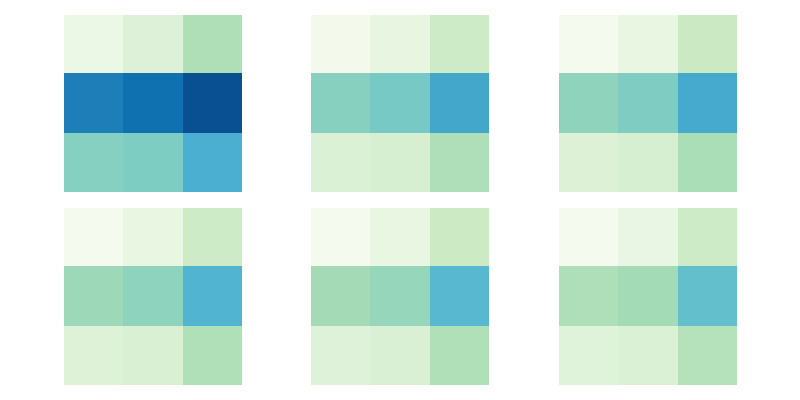

In [64]:
plt.close('all')
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(8,4))

ii=0

xLabel = ['0%', '50%', '100%'] 
yLabel = ['A', 'T'] 
for x in range(2):
    for y in range(3):
        thisAx=ax[x, y]
        thisAx.imshow(gasMat[ii], cmap = 'GnBu', vmin=200, vmax=3000, interpolation='nearest') #
        # thisAx.set_axis_off()
        thisAx.set_xticks([])
        thisAx.set_yticks([])
        thisAx.spines['top'].set_visible(False)
        thisAx.spines['right'].set_visible(False)
        thisAx.spines['bottom'].set_visible(False)
        thisAx.spines['left'].set_visible(False)
        # if x == 0:
        #     thisAx.set_title(xLabel[y])
        # if y == 0:
        #     thisAx.set_ylabel(yLabel[x])
        ii=ii+1
fig.tight_layout()
# plt.savefig('exportSvg/pict.svg', bbox_inches='tight', pad_inches = 0)

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(keyFrame)

# Apply PCA to reduce dimensions
pca = PCA(n_components=3)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# label_mapping = {label: idx for idx, label in enumerate(y.unique())}
# y_encoded = y.map(label_mapping)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['label'] = df_testing['conc']
pca_df['label_liquid'] = df_testing['liquid']
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
pca_df

PC1       PC2       PC3  label label_liquid
0  8.212730 -0.216368 -0.011681    0.0            A
1  0.081490  0.698933 -0.208320    0.5            A
2 -0.143840  0.389912  0.242793    0.0            A
3 -0.662278  0.214519  0.031795    1.0            A
4 -0.903319  0.037960  0.145294    0.0            A
5 -1.364204 -0.107789 -0.117412    0.5            T
6 -1.547074 -0.234407 -0.017835    0.0            T
7 -1.785444 -0.342331 -0.094116    1.0            T
8 -1.888061 -0.440430  0.029482    0.0            T

In [67]:
pca_df[pca_df['label_liquid']=='A']

PC1       PC2       PC3  label label_liquid
0  8.212730 -0.216368 -0.011681    0.0            A
1  0.081490  0.698933 -0.208320    0.5            A
2 -0.143840  0.389912  0.242793    0.0            A
3 -0.662278  0.214519  0.031795    1.0            A
4 -0.903319  0.037960  0.145294    0.0            A

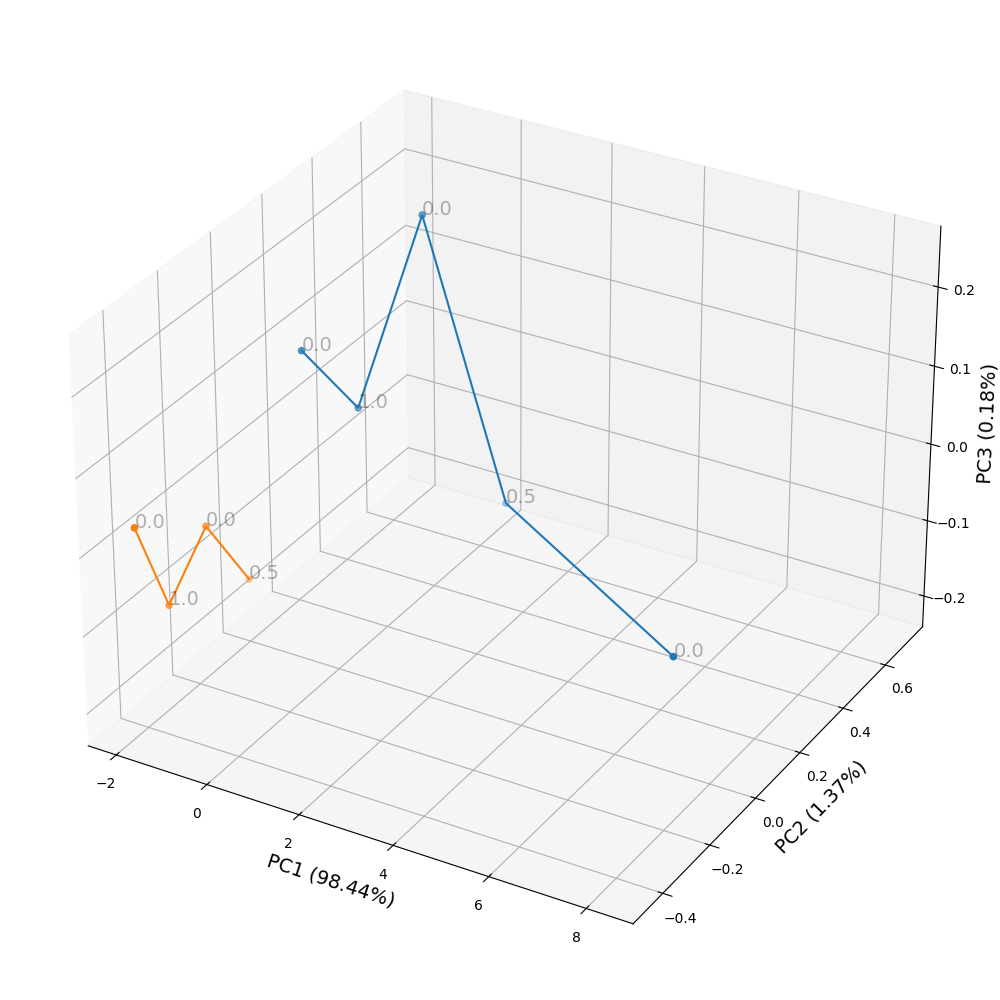

In [68]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.interpolate import splprep, splev

liquidVec = ['A', 'T'] 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
thisAx = ax
# thisAx.scatter3D(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['label']) #
for liquidId in range(2):
    thisDf = pca_df[pca_df['label_liquid']==liquidVec[liquidId]]
    thisAx.plot(thisDf['PC1'], thisDf['PC2'], thisDf['PC3'])  #, c=thisDf['label']
    thisAx.scatter(thisDf['PC1'], thisDf['PC2'], thisDf['PC3'])
    for index, row in thisDf.iterrows():
        thisAx.text(row['PC1'], row['PC2'], row['PC3'], row['label'], size=14, alpha=0.3)
# for memb in range(2):
    # thisAx.plot(X_pca.T[0][[memb, memb+8, memb+8*2]], X_pca.T[1][[memb, memb+8, memb+8*2]], X_pca.T[2][[memb, memb+8, memb+8*2]],color=color_list[memb])
    # thisAx.text(X_pca.T[0][memb],X_pca.T[1][memb],X_pca.T[2][memb], '0%',color=color_list[memb], size=14, alpha=0.3)
    # thisAx.text(X_pca.T[0][memb+8],X_pca.T[1][memb+8],X_pca.T[2][memb+8], '10%',color=color_list[memb], size=14, alpha=0.5)
    # thisAx.text(X_pca.T[0][memb+8*2],X_pca.T[1][memb+8*2],X_pca.T[2][memb+8*2], '50%',color=color_list[memb], size=14, alpha=0.5)



thisAx.set_xlabel(f"PC{1} ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
thisAx.set_ylabel(f"PC{2} ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
thisAx.set_zlabel(f"PC{3} ({pca.explained_variance_ratio_[2]*100:.2f}%)", fontsize=14)
fig.tight_layout()

## 3D plot for paper

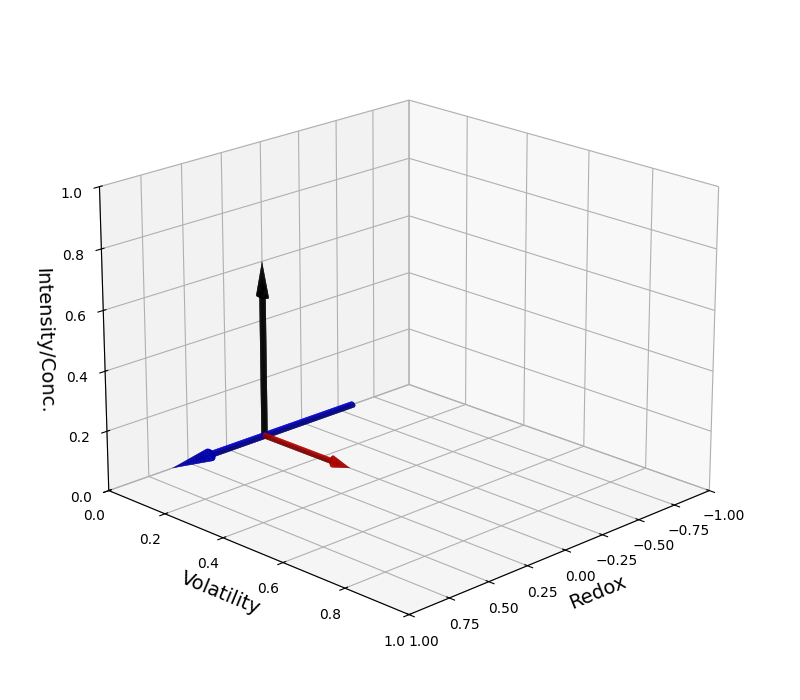

In [101]:
plt.close('all')
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')
thisAx = ax

# thisAx.quiver([-1],[0],[0],[2],[0],[0],linewidth=2, label='Arrow', colors='r')
# thisAx.quiver([0],[0],[0],[0],[1],[0],linewidth=2, label='Arrow', colors='b')
# thisAx.quiver([0],[0],[0],[0],[0],[1],linewidth=2, label='Arrow', colors='black')
arrow3d(ax, length=1.2, width=0.01, head=0.2, headwidth=2, offset=[-0.6,0,0],theta_x=-90, theta_z=-90,  color="blue")
arrow3d(ax, length=0.6, width=0.01, head=0.2, headwidth=2, offset=[0,0,0],theta_x=0,  color="black")
arrow3d(ax, length=0.3, width=0.01, head=0.2, headwidth=2, offset=[0,0,0],theta_x=-90,  color="red")


# thisAx.set_title("Conceptual framework of Odor Map")
thisAx.set_xlim(-1, 1)
thisAx.set_ylim(0, 1)
thisAx.set_zlim(0, 1)

thisAx.set_xlabel(f"Redox", fontsize=14)
thisAx.set_ylabel(f"Volatility", fontsize=14)
thisAx.set_zlabel(f"Intensity/Conc.", fontsize=14)

thisAx.view_init(elev=20, azim=45, roll=0)
fig.tight_layout()
plt.savefig('exportSvg/odorMap.svg', bbox_inches='tight', pad_inches = 0.5)

In [46]:
from mpl_toolkits.mplot3d import Axes3D


def arrow3d(ax, length=1, width=0.05, head=0.2, headwidth=2,
                theta_x=0, theta_z=0, offset=(0,0,0), **kw):
    w = width
    h = head
    hw = headwidth
    theta_x = np.deg2rad(theta_x)
    theta_z = np.deg2rad(theta_z)

    a = [[0,0],[w,0],[w,(1-h)*length],[hw*w,(1-h)*length],[0,length]]
    a = np.array(a)

    r, theta = np.meshgrid(a[:,0], np.linspace(0,2*np.pi,30))
    z = np.tile(a[:,1],r.shape[0]).reshape(r.shape)
    x = r*np.sin(theta)
    y = r*np.cos(theta)

    rot_x = np.array([[1,0,0],[0,np.cos(theta_x),-np.sin(theta_x) ],
                      [0,np.sin(theta_x) ,np.cos(theta_x) ]])
    rot_z = np.array([[np.cos(theta_z),-np.sin(theta_z),0 ],
                      [np.sin(theta_z) ,np.cos(theta_z),0 ],[0,0,1]])

    b1 = np.dot(rot_x, np.c_[x.flatten(),y.flatten(),z.flatten()].T)
    b2 = np.dot(rot_z, b1)
    b2 = b2.T+np.array(offset)
    x = b2[:,0].reshape(r.shape); 
    y = b2[:,1].reshape(r.shape); 
    z = b2[:,2].reshape(r.shape); 
    ax.plot_surface(x,y,z, **kw)